In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modeling
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

In [59]:
# Read gene expression data
expression_data = pd.read_table("TCGA-BRCA.htseq_fpkm-uq_gene_name.tsv")

# Read sample information
sample_info = pd.read_table("TCGA-BRCA.pheno.tsv")


In [60]:
expression_data

,Unnamed: 0,TCGA.E9.A1NI.01A,TCGA.A1.A0SP.01A,TCGA.E2.A14T.01A,TCGA.AR.A24O.01A,TCGA.A8.A09K.01A,TCGA.OL.A5RY.01A,TCGA.BH.A0DG.01A,TCGA.B6.A0I9.01A,TCGA.E9.A1RB.01A,...,TCGA.BH.A0DT.11A,TCGA.BH.A1EV.01A,TCGA.AR.A1AY.01A,TCGA.A8.A0A7.01A,TCGA.BH.A0GY.01A,TCGA.B6.A0RN.01A,TCGA.A8.A09W.01A,TCGA.E9.A1R5.01A,TCGA.B6.A409.01A,TCGA.AR.A2LL.01A
0,TSPAN6,15.668816,18.445279,16.683041,17.100722,17.344965,18.042326,17.957463,17.710707,17.071112,...,18.700012,17.170187,18.055416,16.871405,18.446846,17.868492,17.319686,16.765845,19.398177,17.475588
1,TNMD,0.000000,10.460897,14.098200,13.612552,10.654193,14.041392,13.796357,9.996215,9.356067,...,14.815805,0.000000,11.319451,12.287840,12.172185,9.093125,11.998459,12.775790,13.850298,10.826396
2,DPM1,19.847757,19.582869,19.084218,19.249375,18.979828,19.652291,19.038561,20.249642,19.890710,...,19.180490,19.409985,20.445954,20.178515,21.533684,18.952168,19.484440,19.551358,21.670792,19.341244
3,SCYL3,16.527786,15.682843,17.451710,16.104496,17.504722,16.293014,17.167740,17.544851,16.636196,...,16.473847,17.061408,16.899840,16.584765,16.330942,17.357005,17.370908,17.532099,16.259507,17.041383
4,C1orf112,15.451178,16.037555,15.066195,15.145950,14.972850,15.232057,15.635799,16.250553,16.711859,...,14.713766,15.633821,17.661696,15.770932,15.536987,15.334997,16.732317,15.611986,16.235454,15.824424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19562,BLACAT1,7.491222,14.463777,9.146758,10.922986,0.000000,14.953694,9.982103,10.479311,9.268546,...,13.803486,8.670338,14.822472,9.073290,10.085543,0.000000,0.000000,0.000000,16.407012,6.942366
19563,.330,11.652110,9.150917,12.428429,11.325751,10.927505,0.000000,11.664174,14.268342,10.213508,...,12.548894,12.250606,10.134205,11.239686,11.030992,11.364495,9.466259,10.547515,11.822896,11.906798
19564,.331,0.000000,0.000000,0.000000,7.827715,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19565,.332,9.810255,7.727225,9.302039,9.898724,11.236351,10.828697,8.916813,10.978511,10.008110,...,10.662136,0.000000,9.706672,9.812718,8.022920,8.938914,9.038987,12.533855,0.000000,9.258411


In [61]:
sample_info

,Unnamed: 0,type,tissue_source_site,disease_type
0,TCGA.A2.A0CY.01A,Tumor,B6,Ductal and Lobular Neoplasms
1,TCGA.AO.A0J8.01A,Tumor,A8,Ductal and Lobular Neoplasms
2,TCGA.E2.A14N.01A,Tumor,BH,Ductal and Lobular Neoplasms
3,TCGA.BH.A1F0.11B,Tumor,BH,Ductal and Lobular Neoplasms
4,TCGA.BH.A0BZ.11A,Tumor,AC,Ductal and Lobular Neoplasms
...,...,...,...,...
608,TCGA.EW.A424.01A,Tumor,EW,Ductal and Lobular Neoplasms
609,TCGA.A8.A07L.01A,Tumor,AO,Ductal and Lobular Neoplasms
610,TCGA.BH.A0HI.01A,Tumor,A1,Ductal and Lobular Neoplasms
611,TCGA.PE.A5DD.01A,Tumor,E2,Ductal and Lobular Neoplasms


In [62]:
# cleaning the data
expression_data.dropna(inplace = True)

In [63]:
# extraction the name of features
features = list(expression_data['Unnamed: 0'])

In [64]:
train_sample = sample_info.to_numpy()
train_sample = train_sample.transpose()
sample_column = list(train_sample[0])
train_sample = train_sample[1:,]
data_out = pd.DataFrame(train_sample, columns = sample_column)

In [65]:
# detect intersection between samples
intersec_labels = [value for value in sample_column if value in expression_data.columns.values]

In [66]:
data_label = expression_data.columns.values
print(len(sample_column))
print(len(data_label))

613
1218


In [67]:
# subseting data
expression_data = expression_data[intersec_labels]
data_out = data_out[intersec_labels]

In [68]:
expression_data

,TCGA.A2.A0CY.01A,TCGA.AO.A0J8.01A,TCGA.E2.A14N.01A,TCGA.BH.A1F0.11B,TCGA.BH.A0BZ.11A,TCGA.AC.A2FM.11B,TCGA.A2.A0EN.01A,TCGA.BH.A18G.01A,TCGA.AN.A0XL.01A,TCGA.A2.A0SW.01A,...,TCGA.BH.A0BT.11A,TCGA.LD.A66U.01A,TCGA.BH.A209.01A,TCGA.LL.A50Y.01A,TCGA.BH.A0E2.01A,TCGA.EW.A424.01A,TCGA.A8.A07L.01A,TCGA.BH.A0HI.01A,TCGA.PE.A5DD.01A,TCGA.BH.A0E0.01A
0,18.782026,17.768535,18.155222,18.861721,18.580214,18.510421,18.285124,18.379425,18.009076,15.091191,...,18.801255,17.752343,17.052031,15.812523,18.040590,17.972779,17.265731,16.897974,17.233321,18.709314
1,0.000000,12.386137,11.709310,17.337847,19.853050,16.711121,15.478835,8.819345,15.911435,14.045084,...,14.720999,12.123729,12.292108,11.502906,10.786772,11.579762,0.000000,9.885735,12.968377,13.770598
2,19.361319,18.824546,19.917749,19.361469,18.940160,19.330807,19.054819,18.769004,19.377488,19.971597,...,19.275756,19.549649,19.558975,19.668753,19.304130,19.408273,20.097990,19.237956,18.957937,20.033521
3,16.684798,17.331973,16.025397,16.248498,16.292713,15.462383,16.661301,16.871199,17.077804,16.776854,...,16.436152,16.783813,16.636343,16.854561,16.290971,16.702496,16.858190,16.987303,16.912248,17.443111
4,15.555366,15.808005,16.613364,14.380057,14.234045,13.845508,15.129261,15.526146,15.928020,16.509098,...,14.472782,15.301976,16.715780,15.132140,14.588559,15.475973,16.862459,14.886096,15.963849,16.883291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19562,14.861179,0.000000,15.958083,13.137545,10.257388,13.784410,10.617277,12.506345,8.958604,9.245474,...,13.671068,12.344147,9.965292,7.614775,9.086243,13.152584,0.000000,8.577939,0.000000,12.079348
19563,9.922573,12.074706,11.845234,9.848000,11.688161,9.296872,12.678143,12.897158,11.709575,9.413692,...,12.047221,12.397140,10.811203,11.776287,11.574468,9.947328,12.680304,9.160200,12.598040,11.000272
19564,0.000000,0.000000,0.000000,7.671617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19565,9.495110,7.196831,10.903046,9.420564,8.678310,0.000000,10.135752,8.665196,9.283485,9.570460,...,9.813153,0.000000,8.970265,0.000000,11.284100,9.519856,0.000000,7.736480,8.174832,9.573485


In [69]:
data_out

,TCGA.A2.A0CY.01A,TCGA.AO.A0J8.01A,TCGA.E2.A14N.01A,TCGA.BH.A1F0.11B,TCGA.BH.A0BZ.11A,TCGA.AC.A2FM.11B,TCGA.A2.A0EN.01A,TCGA.BH.A18G.01A,TCGA.AN.A0XL.01A,TCGA.A2.A0SW.01A,...,TCGA.BH.A0BT.11A,TCGA.LD.A66U.01A,TCGA.BH.A209.01A,TCGA.LL.A50Y.01A,TCGA.BH.A0E2.01A,TCGA.EW.A424.01A,TCGA.A8.A07L.01A,TCGA.BH.A0HI.01A,TCGA.PE.A5DD.01A,TCGA.BH.A0E0.01A
0,Tumor,Tumor,Tumor,Tumor,Tumor,Tumor,Tumor,Tumor,Tumor,Tumor,...,Tumor,Tumor,Normal,Tumor,Tumor,Tumor,Tumor,Tumor,Tumor,Normal
1,B6,A8,BH,BH,AC,A8,B6,A7,B6,AO,...,AN,D8,BH,GM,AR,EW,AO,A1,E2,BH
2,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,...,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms


In [70]:
# replace tumor with 1 and normal with 0
for i in range(0,(len(data_out.columns.values))):
    if data_out.iat[0, i] == "Tumor":
        data_out.iat[0, i] = 1
    else:
        data_out.iat[0, i] = 0

In [71]:
data_out

,TCGA.A2.A0CY.01A,TCGA.AO.A0J8.01A,TCGA.E2.A14N.01A,TCGA.BH.A1F0.11B,TCGA.BH.A0BZ.11A,TCGA.AC.A2FM.11B,TCGA.A2.A0EN.01A,TCGA.BH.A18G.01A,TCGA.AN.A0XL.01A,TCGA.A2.A0SW.01A,...,TCGA.BH.A0BT.11A,TCGA.LD.A66U.01A,TCGA.BH.A209.01A,TCGA.LL.A50Y.01A,TCGA.BH.A0E2.01A,TCGA.EW.A424.01A,TCGA.A8.A07L.01A,TCGA.BH.A0HI.01A,TCGA.PE.A5DD.01A,TCGA.BH.A0E0.01A
0,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,0
1,B6,A8,BH,BH,AC,A8,B6,A7,B6,AO,...,AN,D8,BH,GM,AR,EW,AO,A1,E2,BH
2,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,...,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms


In [144]:
X = expression_data.to_numpy()
X = X.transpose()
X = pd.DataFrame(X, columns = features, index = intersec_labels)
X

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,RPS4Y2,.327,.328,TMEM272,.329,BLACAT1,.330,.331,.332,GIMAP1-GIMAP5
TCGA.A2.A0CY.01A,18.782026,0.000000,19.361319,16.684798,15.555366,14.371040,15.185321,19.932684,15.953973,17.875175,...,0.0,12.648116,0.000000,10.089900,11.182144,14.861179,9.922573,0.000000,9.495110,0.000000
TCGA.AO.A0J8.01A,17.768535,12.386137,18.824546,17.331973,15.808005,16.250155,16.371688,18.157287,15.962803,17.824589,...,0.0,11.385353,8.573943,8.785703,12.335088,0.000000,12.074706,0.000000,7.196831,0.000000
TCGA.E2.A14N.01A,18.155222,11.709310,19.917749,16.025397,16.613364,15.698358,14.955033,19.033540,16.526895,18.656945,...,0.0,13.405130,0.000000,10.343592,11.783761,15.958083,11.845234,0.000000,10.903046,0.000000
TCGA.BH.A1F0.11B,18.861721,17.337847,19.361469,16.248498,14.380057,15.605566,17.890767,18.797806,17.268318,17.915765,...,0.0,12.114132,10.387685,8.532398,11.914599,13.137545,9.848000,7.671617,9.420564,7.093035
TCGA.BH.A0BZ.11A,18.580214,19.853050,18.940160,16.292713,14.234045,16.635651,19.015107,18.784831,17.413905,17.937683,...,0.0,11.873019,11.643387,7.471050,11.685564,10.257388,11.688161,0.000000,8.678310,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.EW.A424.01A,17.972779,11.579762,19.408273,16.702496,15.475973,15.136550,16.107530,18.943737,16.833851,18.224118,...,0.0,13.715847,10.487047,10.394537,13.850258,13.152584,9.947328,0.000000,9.519856,0.000000
TCGA.A8.A07L.01A,17.265731,0.000000,20.097990,16.858190,16.862459,13.723452,16.319658,19.888376,17.268727,18.547576,...,0.0,12.436004,0.000000,9.627007,0.000000,0.000000,12.680304,0.000000,0.000000,0.000000
TCGA.BH.A0HI.01A,16.897974,9.885735,19.237956,16.987303,14.886096,15.526247,16.317688,18.939644,16.922132,18.558476,...,0.0,11.595441,9.115491,9.519778,9.420221,8.577939,9.160200,0.000000,7.736480,0.000000
TCGA.PE.A5DD.01A,17.233321,12.968377,18.957937,16.912248,15.963849,16.121715,17.405456,18.481603,16.216809,18.123581,...,0.0,11.138840,0.000000,11.713260,12.180484,0.000000,12.598040,0.000000,8.174832,0.000000


In [76]:
# Initialize a classifier (e.g., Decision Tree)
clf = DecisionTreeClassifier()
y = data_out.iloc[0,:]

In [77]:
# Train the classifier
clf.fit(X, y.values))

DecisionTreeClassifier()

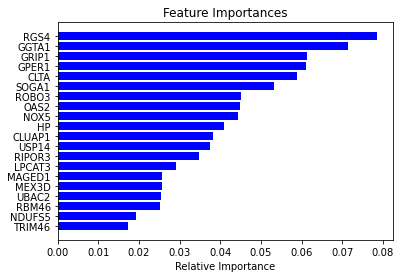

In [78]:
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[-20:]  # top 20 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [79]:
indices = np.argsort(importances)[-100:] # top 100 features
indices = indices[::-1] #reverse
selected_features = list()
selected_features_values =list()
for i in range(0,len(indices)):
    selected_features.append(features[indices[i]])
    selected_features_values.append(importances[indices[i]])
selected_features_values
selected_features_DT = pd.DataFrame(data=selected_features_values, columns=["correlation"], index=selected_features)
selected_features_DT

,correlation
RGS4,0.078453
GGTA1,0.071547
GRIP1,0.061220
GPER1,0.061131
CLTA,0.058916
...,...
GIMAP1-GIMAP5,0.000000
EIF5A,0.000000
PPARG,0.000000
FCRLA,0.000000


#  Random Forest Feature Extraction

In [80]:
model = RandomForestRegressor(random_state=0, max_depth=5)
model.fit(X, y.values)
importances = model.feature_importances_

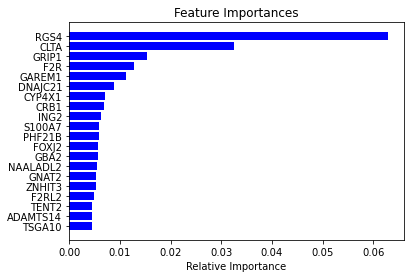

In [81]:
features = X.columns
indices = np.argsort(importances)[-20:]  # top 20 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [102]:
indices = np.argsort(importances)[-100:] # top 100 features
indices = indices[::-1]
selected_features = list()
selected_features_values =list()
for i in range(0,len(indices)):
    selected_features.append(features[indices[i]])
    selected_features_values.append(importances[indices[i]])
selected_features_values
selected_features_RF = pd.DataFrame(data=selected_features_values, columns=["correlation"], index=selected_features)
selected_features_RF

,correlation
RGS4,0.062894
CLTA,0.032589
GRIP1,0.015328
F2R,0.012789
GAREM1,0.011105
...,...
COPG2,0.001899
FAM133A,0.001896
ZNF253,0.001873
CCNI2,0.001869


# Pearson Correlation

In [83]:
df = X
df['output'] = list(y)
cor = df.corr()

In [84]:
#Correlation with output variable
cor_target = abs(cor["output"])
#Selecting highly correlated features
features_sorted = cor_target.sort_values(ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False)
selected_features = features_sorted.iloc[1:101]
heatmap = features_sorted.iloc[0:10]

In [93]:
#make a 10x10 heatmap data
cor_data = cor
cor_data = cor_data[heatmap.index.values]
cor_data = cor_data.transpose()
cor_data = cor_data[heatmap.index.values]
cor_data

,output,ENTPD7,INHBA,ITGAV,CCN4,RING1,ENC1,YME1L1,GRHPR,CLTA
output,1.000000,-0.214233,-0.203877,-0.201440,-0.193949,0.191192,-0.190553,-0.188348,0.187384,0.186346
ENTPD7,-0.214233,1.000000,0.603224,0.551526,0.519806,-0.435637,0.448192,0.476898,-0.432764,-0.398589
INHBA,-0.203877,0.603224,1.000000,0.551982,0.820286,-0.291347,0.456652,0.266035,-0.284828,-0.183996
ITGAV,-0.201440,0.551526,0.551982,1.000000,0.472544,-0.462463,0.335571,0.262639,-0.414550,-0.456860
CCN4,-0.193949,0.519806,0.820286,0.472544,1.000000,-0.138352,0.417246,0.140575,-0.212484,-0.148976
RING1,0.191192,-0.435637,-0.291347,-0.462463,-0.138352,1.000000,-0.176747,-0.499970,0.483588,0.448871
ENC1,-0.190553,0.448192,0.456652,0.335571,0.417246,-0.176747,1.000000,0.140540,-0.227086,-0.147210
YME1L1,-0.188348,0.476898,0.266035,0.262639,0.140575,-0.499970,0.140540,1.000000,-0.313109,-0.232379
GRHPR,0.187384,-0.432764,-0.284828,-0.414550,-0.212484,0.483588,-0.227086,-0.313109,1.000000,0.649375
CLTA,0.186346,-0.398589,-0.183996,-0.456860,-0.148976,0.448871,-0.147210,-0.232379,0.649375,1.000000


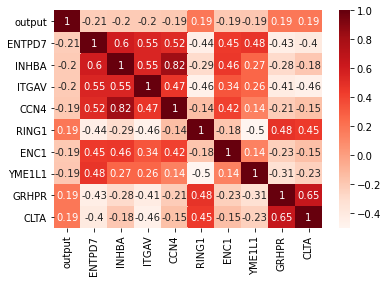

<Figure size 720x720 with 0 Axes>

In [94]:
#drawing heatmap
sns.heatmap(cor_data , annot=True, cmap=plt.cm.Reds, )
plt.figure(figsize=(10,10))
plt.show()

In [96]:
# save features
feature_out = cor["output"]
selected_features.to_csv('feature_analysis_AtoosaAyazbakhsh1.csv')

# delete the most correlated features

In [155]:
upper = cor_data.where(np.triu(np.ones(cor_data.shape),k=1).astype(bool))
upper.abs()
upper

,output,ENTPD7,INHBA,ITGAV,CCN4,RING1,ENC1,YME1L1,GRHPR,CLTA
output,NaN,-0.214233,-0.203877,-0.201440,-0.193949,0.191192,-0.190553,-0.188348,0.187384,0.186346
ENTPD7,NaN,NaN,0.603224,0.551526,0.519806,-0.435637,0.448192,0.476898,-0.432764,-0.398589
INHBA,NaN,NaN,NaN,0.551982,0.820286,-0.291347,0.456652,0.266035,-0.284828,-0.183996
ITGAV,NaN,NaN,NaN,NaN,0.472544,-0.462463,0.335571,0.262639,-0.414550,-0.456860
CCN4,NaN,NaN,NaN,NaN,NaN,-0.138352,0.417246,0.140575,-0.212484,-0.148976
RING1,NaN,NaN,NaN,NaN,NaN,NaN,-0.176747,-0.499970,0.483588,0.448871
ENC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140540,-0.227086,-0.147210
YME1L1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.313109,-0.232379
GRHPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.649375
CLTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
to_drop =  [column for column in upper.columns if any(upper[column] > 0.60)]
to_drop

['INHBA', 'CCN4', 'CLTA']

# Data Clustering with Selected Features

In [145]:
selected_features_RF = selected_features_RF.iloc[0:50]
# selected_features_DT = selected_features_DT.iloc[0:50]
# selected_features = selected_features[0:50]
X = X[X.columns.intersection(list(selected_features_RF.index.values[0:50]))]

In [146]:
X

,FBXL3,PHF21B,GUCY1B1,FOXJ2,GBA2,GNB1,DDX17,USP14,CLUAP1,EXOSC3,...,AP3S1,F2R,S100A7A,CYP4X1,IFNA1,ENTPD7,DHFR,SPDYE9,TAF15,ZNHIT3
TCGA.A2.A0CY.01A,17.471981,15.538316,17.108493,16.932921,17.392681,20.141376,20.246270,18.308878,16.285979,16.660554,...,18.078528,15.754039,10.179851,15.135102,0.000000,15.673500,15.292297,0.0,18.947630,16.449763
TCGA.AO.A0J8.01A,18.152567,11.694480,17.621034,17.359593,17.583188,20.454589,19.934042,19.091123,16.856198,18.090770,...,17.954996,18.250184,0.000000,21.765098,0.000000,16.854853,16.151372,0.0,18.945403,16.737368
TCGA.E2.A14N.01A,16.913263,0.000000,15.148219,17.742023,17.470242,21.432847,20.001300,19.174258,15.299869,18.886942,...,18.028355,18.089700,7.786982,14.187133,0.000000,16.102042,16.293926,0.0,18.959733,16.704937
TCGA.BH.A1F0.11B,18.621059,10.380652,16.378606,17.685750,17.759726,20.317488,20.561760,18.239487,16.165766,16.697483,...,18.530864,17.645815,0.000000,18.640286,0.000000,15.075909,16.372258,0.0,18.716881,16.323624
TCGA.BH.A0BZ.11A,18.010181,8.994871,16.799424,17.432732,18.005223,20.580289,20.457061,18.306303,16.408915,16.436090,...,18.550856,17.955764,6.377737,20.821403,0.000000,16.029420,16.405207,0.0,18.168979,16.042974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.EW.A424.01A,17.498207,15.312940,15.978330,16.863016,18.043897,19.646500,19.842134,18.047928,16.403400,17.114429,...,18.781642,18.800910,0.000000,17.878924,8.159124,15.494456,15.977255,0.0,19.225694,17.043852
TCGA.A8.A07L.01A,16.729649,9.985824,16.457368,17.638922,17.624165,19.796924,19.749395,19.083284,16.111686,18.763706,...,18.779551,18.471307,0.000000,18.513603,0.000000,16.776339,17.178042,0.0,19.085995,16.585953
TCGA.BH.A0HI.01A,18.052325,10.748234,16.925911,16.916142,17.732032,20.636726,20.021245,20.230080,16.402599,17.400513,...,17.302439,18.612743,0.000000,20.338250,0.000000,17.420862,16.157057,0.0,19.221767,16.657268
TCGA.PE.A5DD.01A,16.128313,8.491103,16.967870,17.273601,18.288083,20.514379,20.140312,18.041982,15.811535,19.627919,...,18.551588,18.842274,6.867735,21.490074,0.000000,17.379154,16.048391,0.0,18.074202,16.299348


In [147]:
# unsupervised clustring(Spectral Clustering)
clustering = SpectralClustering(n_clusters = 2, assign_labels = 'discretize', random_state=0).fit(X)

In [148]:
X['labels'] = clustering.labels_

<ipython-input-148-2ea28d75a4b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['labels'] = clustering.labels_


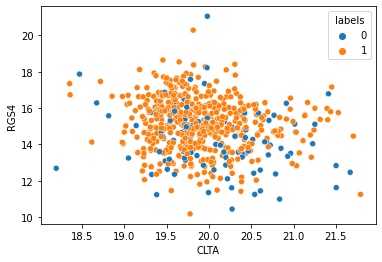

<Figure size 432x288 with 0 Axes>

In [149]:
sns.scatterplot(data=X, y=selected_features_RF.index.values[0], x=selected_features_RF.index.values[1], hue='labels')
plt.figure()
plt.show()

In [150]:
# unsupervised clustring(KMeans)

X = X[X.columns.intersection(list(selected_features_RF.index.values[0:50]))]
KM = KMeans(n_clusters=2, random_state=0, n_init=1000).fit(X)

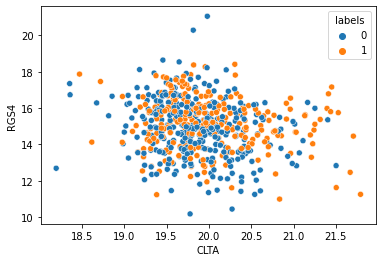

<Figure size 1440x1440 with 0 Axes>

In [151]:
X['labels'] = list(KM.labels_)
sns.scatterplot(data=X, y=selected_features_RF.index.values[0], x=selected_features_RF.index.values[1] , hue="labels")
plt.figure(figsize=(20,20))
plt.show()

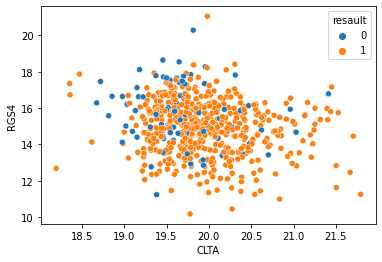

<Figure size 1440x1440 with 0 Axes>

In [157]:
X = X[X.columns.intersection(list(selected_features_RF.index.values[0:50]))]
X['resault'] = y.values
sns.scatterplot(data=X, y=selected_features_RF.index.values[0], x=selected_features_RF.index.values[1] , hue="resault")
plt.figure(figsize=(20,20))
plt.show()